#### TASK NAME : Iris Flowers Classification ML Project

#### Performed By : Navneet Dhamal

### Dataset : http://archive.ics.uci.edu/ml/datasets/Iris 

# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, Classification_report, confusion_matrix

# Loading Data

In [2]:
iris = pd.read_csv("C:/Users/Nilima/Desktop/Regression/iris.csv")
iris.head()

,SeptalLengthCm,SeptalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,SeptalLengthCm,SeptalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Understanding The Data

In [4]:
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeptalLengthCm  150 non-null    float64
 1   SeptalWidthCm   150 non-null    float64
 2   PetalLengthCm   150 non-null    float64
 3   PetalWidthCm    150 non-null    float64
 4   Species         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Checking the number of rows that belongs to each class

In [6]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# Data Visualization

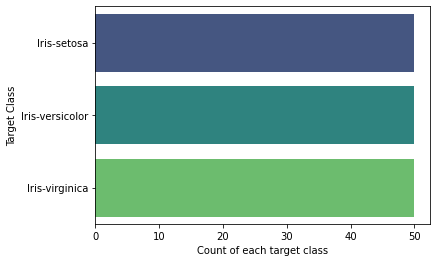

In [7]:
sns.countplot(y = 'Species', data = iris , palette = "viridis")
plt.xlabel("Count of each target class")
plt.ylabel("Target Class")
plt.show()

### Plotting multiple pairwise bivariate distirbutions in a dataset using pairplot 

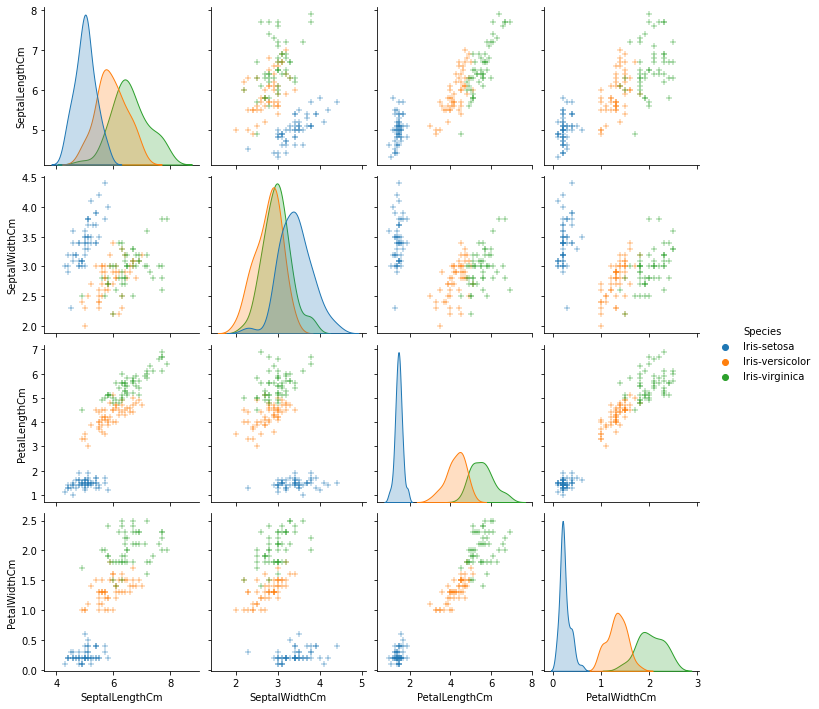

In [8]:
sns.pairplot(iris,hue='Species',markers='+')
plt.show()

#### It shows that iris-Setosa is seprated from both other species in all the features .
#### Plotting the heatmapto check the correlation , dataset corr() is used to find the pairwise correlation of all columns in the dataframes

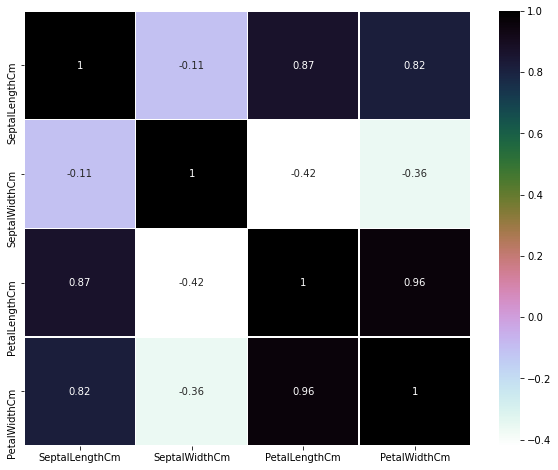

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r', linewidth= 0.4)
plt.show()

# Model Building

### Splitting the dataset

In [10]:
x= iris.drop(['Species'], axis=1)
y= iris['Species']
print(f'x shape: {x.shape} | y shape: {y.shape} ')

x shape: (150, 4) | y shape: (150,) 


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=0, test_size=0.33)

In [12]:
knn_model =KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

### Prediction and Performance Matric

In [13]:
knn_predict = knn_model.predict(x_test)

### Fitting Method Of the knn object

In [16]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Predict Method of the Knn object

In [20]:
print(f"""
KNN Accuracy : {accuracy_score(y_test , knn_predict)}
""")


KNN Accuracy : 0.98



In [23]:
from sklearn.metrics import confusion_matrix
print(f"""
KNN Confusion Matrix:
{confusion_matrix(y_test, knn_predict)},
""")


KNN Confusion Matrix:
[[17  0  0]
 [ 0 16  1]
 [ 0  0 16]],



In [29]:
from sklearn.metrics import classification_report
print(f"""
KNN Classification Report :
{classification_report(y_test, knn_predict)},
""")


KNN Classification Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50
,

